In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

In [9]:
transform = transforms.Compose([
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
        ])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='../datasets/cifar10_original_data', train=True,
                                        download=True, transform=transform)
#trainset.data = trainset.data[:]
#trainset.targets = trainset.targets[:]
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../datasets/cifar10_original_data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [10]:
import numpy as np
X_train = trainset.data
y_train = np.array(trainset.targets)
X_test = testset.data
y_test = np.array(testset.targets)

In [11]:
type(X_train)

numpy.ndarray

In [3]:
import numpy as np
from scipy.stats import entropy
base = 2  # work in units of bits
pk = np.array([0.2, 0.8])  # fair coin
H = entropy(pk, base=base)
H


0.7219280948873623

In [6]:
import numpy as np
from scipy.stats import entropy
base = 2  # work in units of bits
pk = np.array([0.2])  # fair coin
H = entropy(pk, base=base)
H

0.0

In [12]:
y_test.shape

(10000,)

In [13]:
X_train[0].shape

(32, 32, 3)

In [14]:
from torch.utils.data import Dataset, TensorDataset
class CustomTensorDataset(Dataset):
    """TensorDataset with support of transforms.
    """
    def __init__(self, x, y, transform=None):
        self.x = x
        self.y = y
        self.transform = transform

    def __getitem__(self, index):
        x = self.x[index]

        if self.transform:
            x = self.transform(x)

        y = self.y[index]

        return x, y

    def __len__(self):
        return len(self.x)

In [15]:
from torch.utils.data import Dataset, TensorDataset
transform1 = transforms.Compose([
            transforms.ToPILImage(),
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
        ])

transform2 = transforms.Compose([
            #transforms.ToPILImage(),
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
        ])
trainset = CustomTensorDataset(X_train, y_train, transform=transform1)
testset = CustomTensorDataset(X_test, y_test, transform=transform2)

In [16]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [17]:
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [18]:
from rac.utils.models import cifar10net, resnet

In [19]:
import torch.nn as nn
import torch.nn.functional as F

In [172]:
model1 = resnet.ResNet18()
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    outputs, e = model1(inputs, last=True)
    print(outputs.shape, e.shape)
    break

torch.Size([128, 10]) torch.Size([128, 512])


In [11]:
model1 = cifar10net.CifarNet()
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    outputs, e = model1(inputs, last=True)
    print(outputs.shape, e.shape)
    break

torch.Size([256, 10]) torch.Size([256, 256])


In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [21]:
device

device(type='cuda', index=0)

In [23]:
import torch.optim as optim
#model1 = cifar10net.CifarNet().to(device)
resnet_model = resnet.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet_model.parameters(), lr=0.001, momentum=0.9)

In [24]:
for epoch in range(200):  # loop over the dataset multiple times
    print(epoch)

    running_loss = 0.0
    step = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device),

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = resnet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        step += 1
    print("loss: ", running_loss/step)
    step = 0
    running_loss = 0.0
print('Finished Training')

0
loss:  1.6301084482456412
1
loss:  1.2052332870185833
2
loss:  0.9880083224657551
3
loss:  0.8417643240040831
4
loss:  0.7413882800685171
5
loss:  0.6650938836052595
6
loss:  0.604618360624289
7
loss:  0.5501956445024446
8
loss:  0.511761770376464
9
loss:  0.4791406128565064
10
loss:  0.448650045620511
11
loss:  0.4191503155490626
12
loss:  0.39869052968214236
13
loss:  0.37352940455422073
14
loss:  0.35493854000745223
15
loss:  0.3374041950001436
16
loss:  0.3185030119422147
17
loss:  0.3074923846346643
18
loss:  0.29109362434700625
19
loss:  0.27397948099524166
20
loss:  0.26201940350749
21
loss:  0.2489969413489332
22
loss:  0.23962745028536034
23
loss:  0.23146832682897367
24
loss:  0.21733764987772383
25
loss:  0.20742623692811907
26
loss:  0.20030033636047406
27
loss:  0.18682997904317764
28
loss:  0.18573372923504666
29
loss:  0.175299566725026
30
loss:  0.1690196701708962
31
loss:  0.15615444054917607
32
loss:  0.1543192547338698
33
loss:  0.14599033137378487
34
loss:  0.1400

In [25]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = resnet_model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 88 %


In [311]:
len(trainloader)

391

In [31]:
def get_embedding(model, dataset, dataloader, device="cuda"):
    # Ensure model is on right device and is in eval. mode
    model.eval()
    model = model.to(device)

    # Create a tensor to hold embeddings
    embedding = torch.zeros([len(dataset), model.get_embedding_dim()]).to(device)
    evaluated_instances = 0
    labels = []
    with torch.no_grad():
        for batch_idx, data in enumerate(dataloader):
            # Calculate softmax (probabilities) of predictions
            x, y = data[0].to(device), data[1].to(device)
            #out, l1 = model(elements_to_predict, return_embedding=True)
            out, l1 = model(x, last=True)
            labels.extend(y.tolist())
            # Insert the calculated batch of probabilities into the tensor to return
            #print(data)
            l1 = torch.Tensor(l1)
            start_slice = evaluated_instances
            end_slice = start_slice + x.shape[0]
            embedding[start_slice:end_slice] = l1
            evaluated_instances = end_slice

    return embedding, labels

In [33]:
X_train_embedding, y_train_ = get_embedding(resnet_model, trainset, trainloader)

In [34]:
X_train_embedding.shape

torch.Size([50000, 512])

In [36]:
#np.save("X_train_cifar.npy", X_train_embedding.cpu().numpy())
#np.save("Y_train_cifar.npy", y_train_)

In [38]:
X_test_embedding, y_test_ = get_embedding(resnet_model, testset, testloader)

In [39]:
#np.save("X_test_cifar.npy", X_test_embedding.cpu().numpy())
#np.save("Y_test_cifar.npy", y_test_)

In [44]:
X_train = np.load("X_train_cifar.npy")
y_train = np.load("Y_train_cifar.npy")

In [45]:
X_test = np.load("X_test_cifar.npy")
y_test = np.load("Y_test_cifar.npy")

In [349]:
#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler()
#X_train = scaler.fit_transform(X_train)

In [47]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 512) (50000,) (10000, 512) (10000,)


In [219]:
X.shape

(50000, 512)

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
from torch.utils.data import Dataset, TensorDataset
trainset = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train).double())
testset = TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test).double())

In [49]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

In [50]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [51]:
import torch.optim as optim
from rac.utils.models import simpleNN_net
model1 = simpleNN_net.ThreeLayerNet(512, 10, 1024, 256).to(device)
#model1 = resnet.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)

In [52]:
for epoch in range(100):  # loop over the dataset multiple times
    print(epoch)

    running_loss = 0.0
    step = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].type(torch.LongTensor).to(device),

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        step += 1
    print("loss: ", running_loss/step)
    step = 0
    running_loss = 0.0
print('Finished Training')

0
loss:  0.7050782884173381
1
loss:  0.08211004949362992
2
loss:  0.054712639959610024
3
loss:  0.04483557282172886
4
loss:  0.03954413725668207
5
loss:  0.036161978533753504
6
loss:  0.03407068403147142
7
loss:  0.03227394548914088
8
loss:  0.03086422065563519
9
loss:  0.02984059114030579
10
loss:  0.02899590012905619
11
loss:  0.02805830869714127
12
loss:  0.027532402859510058
13
loss:  0.02690451638594441
14
loss:  0.026426743766616866
15
loss:  0.025991626241056207
16
loss:  0.025535073595793198
17
loss:  0.02519928564822487
18
loss:  0.024804587002553027
19
loss:  0.024544678166951706
20
loss:  0.024249407458607385
21
loss:  0.023892022961991197
22
loss:  0.02365243533218894
23
loss:  0.023412759134145762
24
loss:  0.023181603163899972
25
loss:  0.0229562884900788
26
loss:  0.022699490386654465
27
loss:  0.02243053791699145
28
loss:  0.022356244465967408
29
loss:  0.02205462851847434
30
loss:  0.02190571526899729
31
loss:  0.021819669250136866
32
loss:  0.021527218961995335
33
los

In [53]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 89 %


In [208]:
X.shape

(1000, 100)

In [213]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
X_new.shape

(1000, 2)

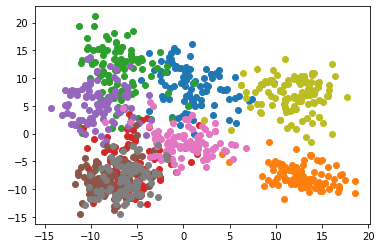

In [217]:
for i in range(0,9):
    inds = np.where(Y == i)
    plt.scatter(X_new[inds,0], X_new[inds,1])